In [17]:
# Ques 12 (i)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create random dataset
np.random.seed(42)  # for reproducibility
df = pd.DataFrame(np.random.randint(1, 201, size=(100, 30)))
df.to_csv("random_dataset_with_na.csv", index=False) # saves df file to csv

# Step 2: Replace values between 10 and 60 (inclusive) with NA
df = df.map(lambda x: np.nan if 10 <= x <= 60 else x)

# Step 3: Count rows with at least one missing value
rows_with_na = df.isnull().any(axis=1).sum()
print(f"Number of rows with missing values: {rows_with_na}")

#view file
df = pd.read_csv("random_dataset_with_na.csv")
print(df.head(4)) # 2 rows with 30 columns


Number of rows with missing values: 100
     0    1    2    3    4    5    6    7    8    9  ...   20   21   22   23  \
0  103  180   93   15  107   72  189   21  103  122  ...   88  158   38  130   
1   89   49   59  170  188   15  190  190  175  190  ...   18  132   89   60   
2   92  111  188  199  172    8  175   35   81  164  ...  146   44  162  190   
3   40   82  111   53   24  154  188  124   41  157  ...  139   81  136  163   

    24   25   26   27   28   29  
0  192  188   21  161   58   22  
1   14    9   90   53  130   84  
2   14   95   48   15  200  190  
3  163   33  123    5   41   28  

[4 rows x 30 columns]


In [22]:
# Ques 12 (ii)
df_filled = df.fillna(df.mean())


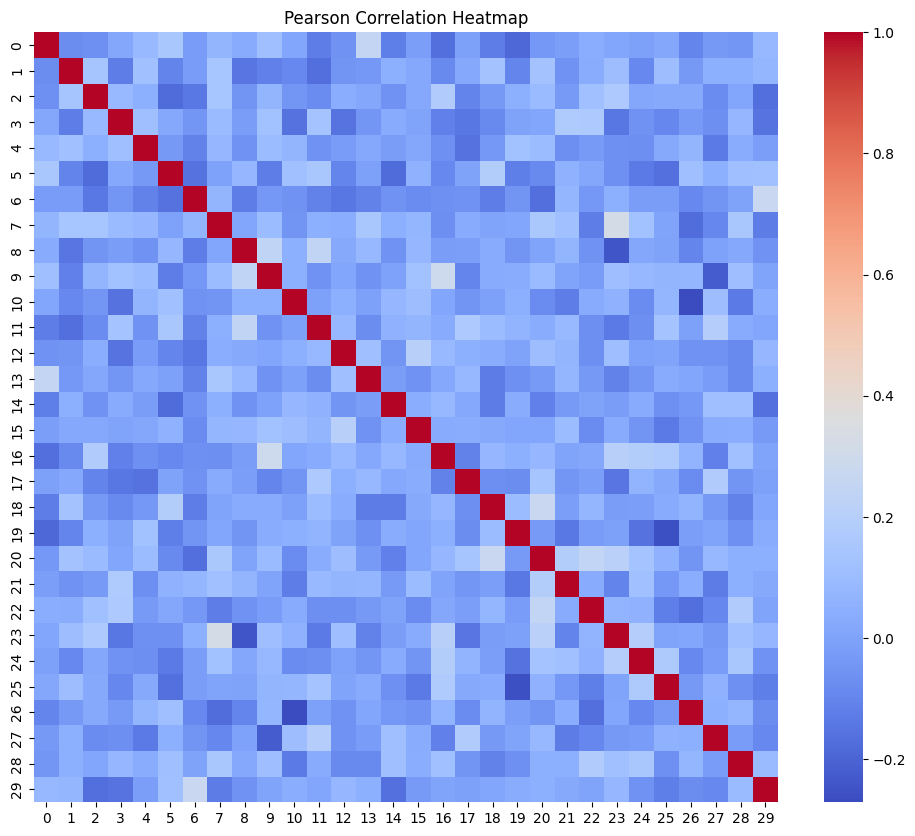

Columns with correlation <= 0.7: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [8]:
# Ques 12 (iii)
# Step 1: Compute Pearson correlation
corr_matrix = df_filled.corr()

# Step 2: Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Pearson Correlation Heatmap")
plt.show()

# Step 3: Select columns where correlation with all other columns is <= 0.7
high_corr = (corr_matrix.abs() > 0.7) & (corr_matrix.abs() < 1)
non_high_corr_columns = [col for col in corr_matrix.columns if not high_corr[col].any()]
print(f"Columns with correlation <= 0.7: {non_high_corr_columns}")

In [20]:
# Ques 12 (iv)
# Min-Max normalization to scale between 0 and 10
df_normalized = (df_filled - df_filled.min()) / (df_filled.max() - df_filled.min()) * 10


In [21]:
# Ques 12 (v)
df_binary = df_normalized.map(lambda x: 1 if x <= 0.5 else 0)